In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [33]:
# import torch
# import tensorflow as tf
# import xgboost as xgb

# print(f"1. PyTorch GPU Available: {torch.cuda.is_available()}")
# if torch.cuda.is_available():
#     print(f"   Device: {torch.cuda.get_device_name(0)}")

# print(f"\n2. TensorFlow GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
# print("   (Harusnya False untuk TF 2.15 di Windows)")

# # XGBoost cek build info
# print(f"\n3. XGBoost Version: {xgb.__version__}")

In [34]:
path = "D:\development\predictive_pm25\data\data_training\TUTL_RAW_2023-2025.csv"

In [35]:
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\development\\predictive_pm25\\data\\data_training\\TUTL_RAW_2023-2025.csv'

In [ ]:
df.describe()

,id,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar
count,426650.000000,417519.000000,4.176560e+05,276408.000000,322366.000000,401906.000000,407618.000000,243101.000000,872.000000,3.318800e+04,0.0
mean,255305.428016,26.264783,3.085701e+05,24.179864,77.782093,639.712592,44.605762,2.721174,0.254587,1.381887e+05,NaN
std,149923.457442,91.214645,2.573745e+07,95.337150,250.183434,223.343031,302.523151,81.301086,7.517869,1.420302e+06,NaN
min,1.000000,-1250.000000,-1.250000e+03,-8.810000,-114346.000000,0.000000,0.000000,0.000000,0.000000,-1.242553e+04,NaN
25%,106663.250000,24.300000,5.800000e+01,21.470000,67.000000,537.020020,20.000000,0.140000,0.000000,0.000000e+00,NaN
50%,278137.500000,26.590000,7.000000e+01,23.340000,82.000000,626.460000,38.000000,2.080000,0.000000,9.247865e+04,NaN
75%,385181.750000,29.420000,8.090000e+01,28.200000,92.000000,705.030030,55.000000,4.060000,0.000000,9.275921e+04,NaN
max,491844.000000,30350.000000,2.147484e+09,24304.000000,61337.000000,4989.965820,64319.000000,40000.000000,222.000000,3.219415e+07,NaN


In [ ]:
total_rows = len(df)
missing = df.isnull().sum()
present = df.notnull().sum()
pct_missing = (missing / total_rows) * 100
quality_report = pd.DataFrame({
    'Data Hilang': missing,
    'Data Tersedia': present,
    'Total Seharusnya': total_rows,
    '% Hilang': pct_missing
})
print(quality_report.sort_values(by='% Hilang', ascending=False))

             Data Hilang  Data Tersedia  Total Seharusnya    % Hilang
solar             426650              0            426650  100.000000
wd                425778            872            426650   99.795617
pressure          393462          33188            426650   92.221259
ws                183549         243101            426650   43.020977
sht31_temp        150242         276408            426650   35.214344
sht31_hum         104284         322366            426650   24.442517
co2                24744         401906            426650    5.799602
pm25               19032         407618            426650    4.460799
temperature         9131         417519            426650    2.140162
humidity            8994         417656            426650    2.108051
id                     0         426650            426650    0.000000
created_at             0         426650            426650    0.000000


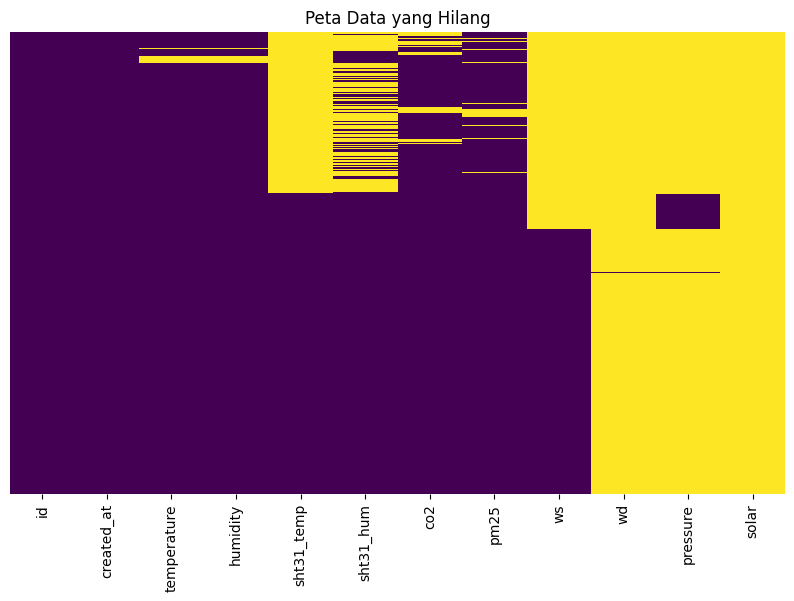

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Peta Data yang Hilang')
plt.show()

## Yearly EDA

In [ ]:
df.head()

,id,created_at,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar,year
0,1,2023-03-29 20:08:00,28.6,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2,2023-03-29 20:10:00,28.6,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2,3,2023-03-29 20:20:00,29.8,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,4,2023-03-29 20:22:00,29.8,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4,5,2023-03-29 20:24:00,28.6,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
target_cols = ['pm25', 'temperature', 'humidity', 'ws', 'wd','sht31_temp','sht31_hum']

percentage_missing = df.groupby('year')[target_cols].apply(
    lambda x: x.isnull().mean() * 100
)

percentage_missing = percentage_missing.round(2)

percentage_missing = percentage_missing.reset_index()

print("Data Awal (Cuplikan):")
df.head()
print("\n--- Hasil Persentase Data Hilang per Tahun per Kolom ---")
print(percentage_missing)

Data Awal (Cuplikan):

--- Hasil Persentase Data Hilang per Tahun per Kolom ---
   year   pm25  temperature  humidity      ws      wd  sht31_temp  sht31_hum
0  2023  16.11         8.76      8.76  100.00  100.00      100.00      63.90
1  2024   2.95         0.12      0.08   74.74  100.00       48.66      37.19
2  2025   0.61         0.66      0.62    0.63   99.59        0.64       0.64


### before interpolation

#### average yearly

In [ ]:
cols = ['pm25', 'temperature', 'humidity', 'ws', 'wd']
yearly_avg = df.groupby('year')[cols].mean().reset_index()
print("Tabel Rata-rata per Tahun:")
print(yearly_avg)

Tabel Rata-rata per Tahun:
   year       pm25  temperature       humidity        ws        wd
0  2023  36.785868    22.957685      51.628608       NaN       NaN
1  2024  43.302090    25.010616  369911.031380  3.329023       NaN
2  2025  48.069714    28.265655  387122.454673  2.628047  0.254587


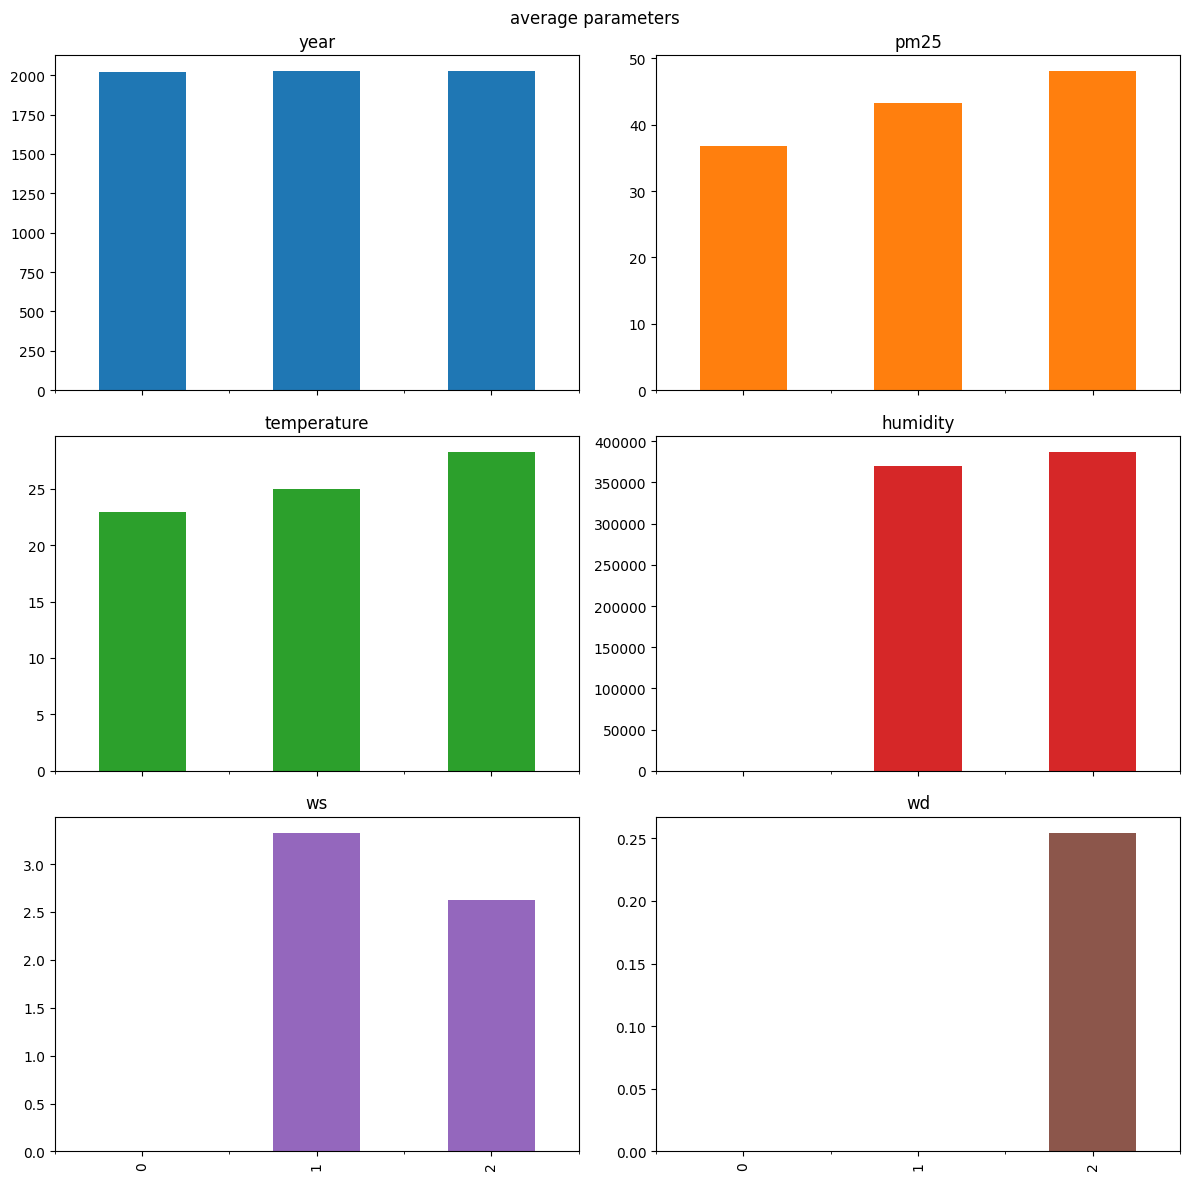

In [ ]:
from matplotlib.pyplot import plot
ax = yearly_avg.plot(kind='bar', subplots=True, 
                    layout=(3,2),figsize=(12,12),
                    sharex=True,
                    title='average parameters',
                    legend=False)
plt.tight_layout()
plt.show()

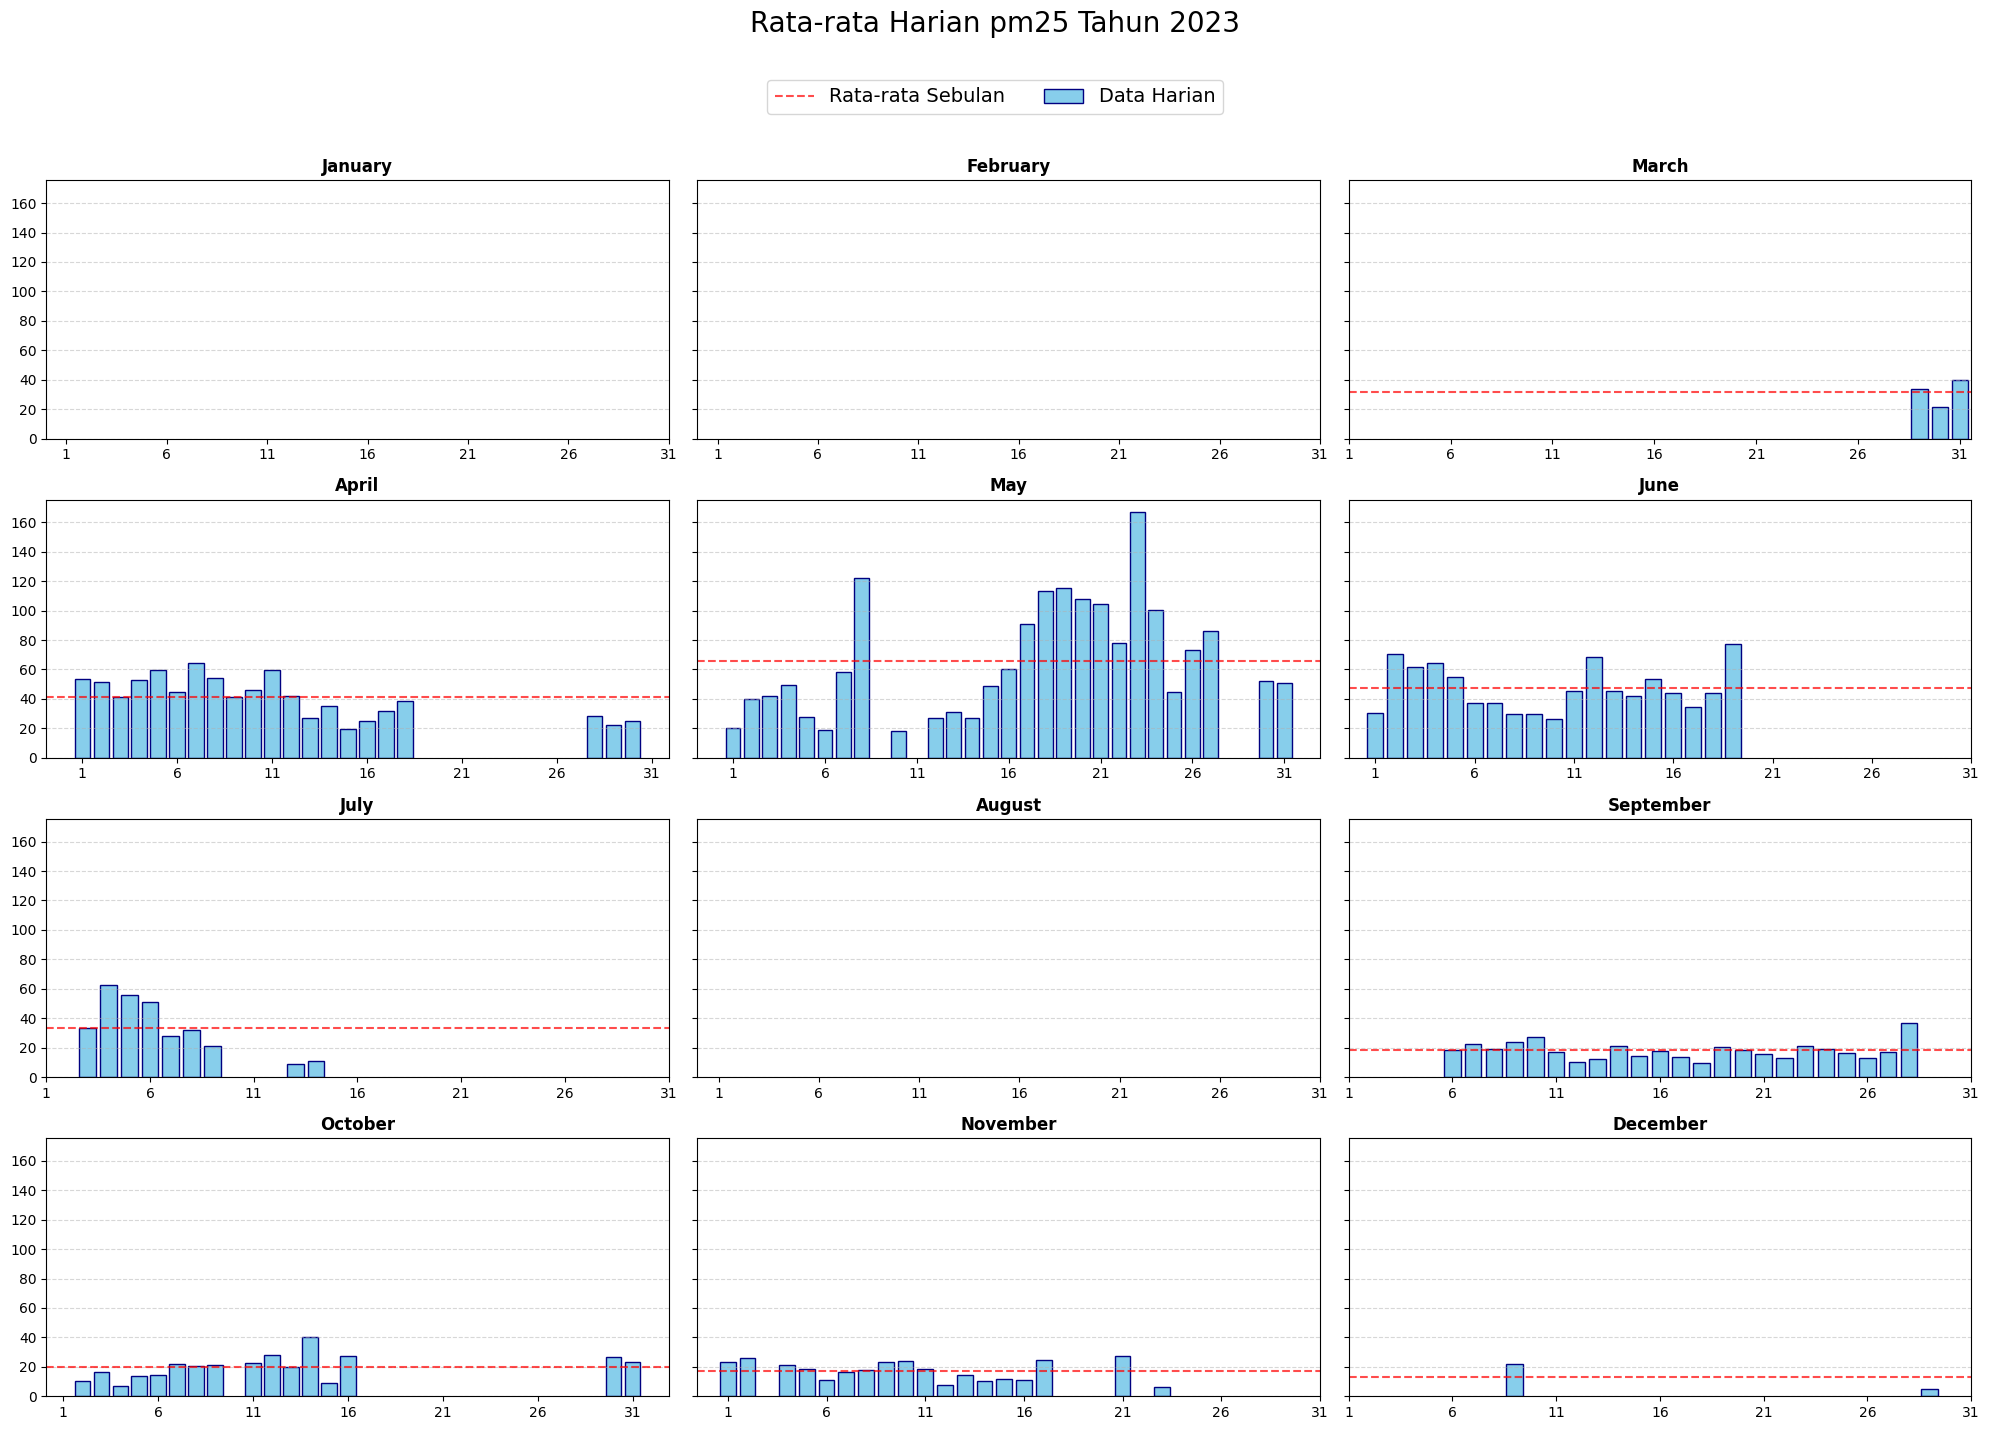

In [37]:
import calendar
df['created_at'] = pd.to_datetime(df['created_at'])
df_2023 = df[df['created_at'].dt.year == 2023].copy()
df_2023 = df_2023.set_index('created_at')
daily_avg = df_2023.resample('D').mean()

kolom_target = 'pm25' 

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharey=True)
fig.suptitle(f'Rata-rata Harian {kolom_target} Tahun 2023', fontsize=20)

axes = axes.flatten()

for i in range(1, 13): 
    data_bulan = daily_avg[daily_avg.index.month == i]
    ax = axes[i-1]
    
    if not data_bulan.empty:
        ax.bar(data_bulan.index.day, data_bulan[kolom_target], 
               color='skyblue', edgecolor='navy', label='Data Harian')
        
        rata_rata_bulan = data_bulan[kolom_target].mean()
        ax.axhline(y=rata_rata_bulan, color='red', linestyle='--', alpha=0.7, label='Rata-rata Sebulan')
    
    nama_bulan = calendar.month_name[i]
    ax.set_title(nama_bulan, fontsize=12, fontweight='bold')
    ax.set_xticks(range(1, 32, 5))
    ax.grid(axis='y', linestyle='--', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.94), fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.92]) 
plt.show()